<a href="https://colab.research.google.com/github/Umesh1307/Email-Campaign-Effectiveness-Prediction-Supervised-Classification-Capstone-Project-/blob/main/Email_Campaign_Effectiveness_Prediction_(Supervised_Classification_Capstone_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Campaign Effectiveness Prediction**

---



# **Problem Statement:**

---


## Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

---



## 😇 Before Delving deep straight into the coding part, let's understand the problem statement together 😇

---

### Electronic mail (or E-mail or email) is an Internet service that allows people who have an e-mail address (accounts) to send and receive electronic letters. Those are much like postal letters, except that they are delivered much faster than snail mail when sending over long distances, and are usually free.
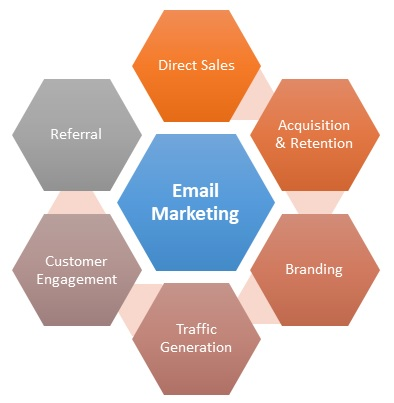

Curious about email marketing [click the link](https://simple.wikipedia.org/wiki/E-mail)
---


---
# Definitions of Attributes
--- 
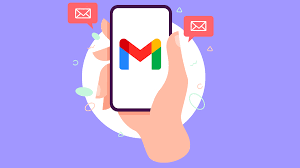
### The data has the following features:
### 1. Email_ID - This column contains the email ids of individuals.

### 2. Email_type - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

### 3. Subject_Hotness_Score - It is the subject-line effectiveness score.

### 4. Email_Source - It represents the source of the email like sales,marketing or product type email.

### 5. Email_Campaign_Type - Campaign type

### 6. Total_Past_Communications - This column contains the previous mails from the source.

### 7. Customer_Location - Categorical data which explains the different demographic location of the customers.

### 8. Time_Email_sent_Category - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

### 9. Word_Count - It contains the no.of words in the mail.

### 10. Total_Links - Total links in the email body.

### 11. Total_Images - The banner images in the email body.

### 12. Email_Status - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.
--- 


# Objective of Project:
--- 
### * The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

### * In addition to the ML Model prediction, we also analyzed what all features can help us in getting the Email status to be not ignored by the customers.
--- 

# Process Outline:
--- 
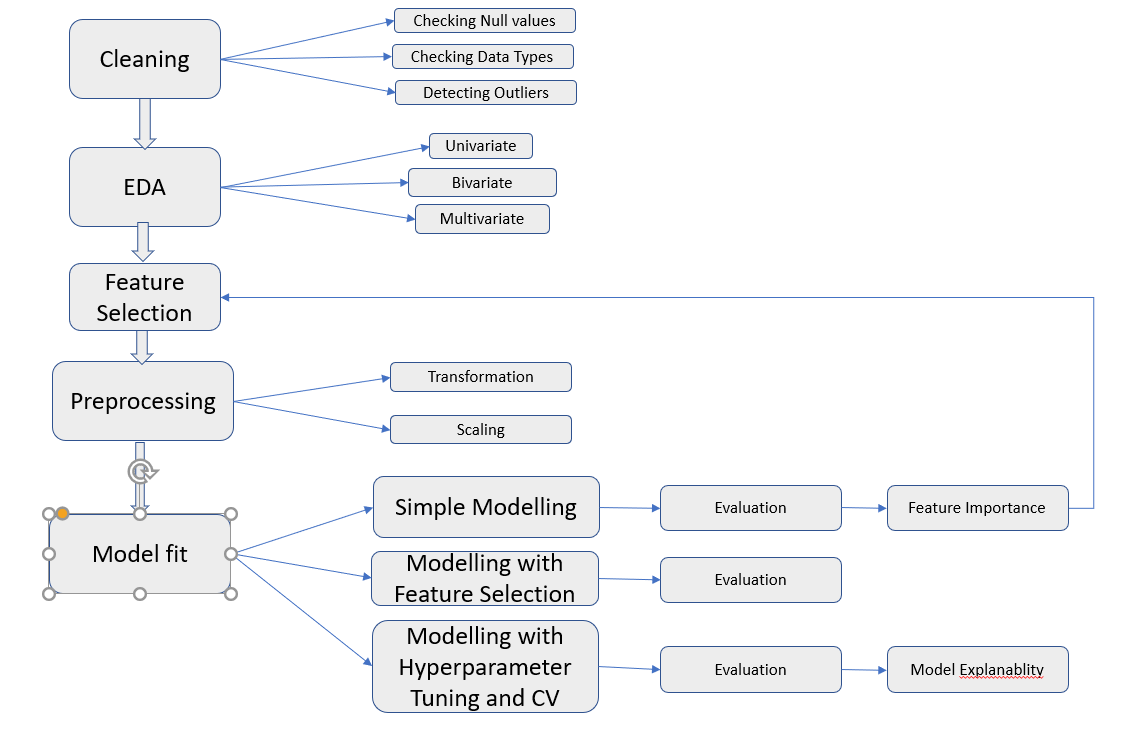

# *STEP 1: LOADING THE DATASET*

In [ ]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import pylab
import missingno as mno
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Loading the dataset
email_df=pd.read_csv("/content/drive/MyDrive/Almabetter Project/Capstone - Projects/Module 4 Supervised ML Classification/data_email_campaign.csv")

In [ ]:
# Let's have a look at the head of dataset
email_df.head()

In [ ]:
# Let's use the colab data table feature to visualize explictly! This feature was new one for me :)
from google.colab.data_table import DataTable
DataTable(email_df)

# A few interesting features of the data table display:😇

---


* ### Clicking the Filter button in the upper right allows you to search for terms or values in any particular column.

* ### Clicking on any column title lets you sort the results according to that column's value.

* ### The table displays only a subset of the data at a time. You can navigate through pages of data using the controls on the lower right.

---




In [ ]:
# Checking the tail of the dataset:)
email_df.tail(3)

In [ ]:
# Checking the shape of the dataset:)
print(f"The Shape of dataset is {email_df.shape} There are {email_df.shape[0]} rows and {email_df.shape[1]} columns")

# Information understanding:

---


### We will be using pandas info method and checking the information about the features, about their datatypes (float, integer, object, datetime, null(missing) or non-null(non-missing), total number of entities in each features.

---




In [ ]:
# Let's have a look at the data type of the features.
email_df.info()



---


# Observations:

---

* ### There are in total 11 variables out of which 10 are independent variables and 1 is dependent which is our target variable.

* ### Categorical Data:
### Out of all the features we have a total of 6 categorical feature variables.
1. * #### Email_Type
2. * #### Email_source_Type
3. * #### Customer_location
4. * #### Email_Campaign_type
5. * #### Time_Email_Sent_Catagory
6. * #### Email_Satus

* ### Target Variable: Email_Status Out of these categorical variables, Email_Status is our target variable which shows 3 different statuses as “Ignored”, “Read” and “Acknowledged”.

* ### There are five numerical or continuous features namely 
1. * "Subject_Hotness_Score" 
2. * "Total_Past_Communications", 
3. * "Word_Count", 
4. * "Total_Links", 
5. * "Total_Images".

* ### There are null values in Customer_Location, Total_Past_Communications, Total_Links, Total_Images features.



---




# *Cleaning, Transforming, Null Value Treatment:*

---


* ## cleaning:
### In this process or step we will be removing undesired features, unwanted prefixes, suffixes we will be having in our data.
* ## Transforming:
### In this step we will transform the datatype of given features to the desired datatype.
* ## Null Value Treatment:
### Here we will be using pandas isnull method to check the presence of null values and if they exist we will be filling them out with appropriate logical reasons and calculation.

---



In [ ]:
# checking if there is any null value in dataset
email_df.isnull().any()

In [ ]:
# Calculating the total number of null values inside each features
email_df.isnull().sum()

In [ ]:
# Let's have a look at the missing values matrix
ax=mno.matrix(email_df, figsize = (12, 5))
plt.title("Missing Values Matrix")
plt.show()

In [ ]:
## Lets go and see the percentage of missing values
email_df.isnull().mean()

Email_ID                     0.000000
Email_Type                   0.000000
Subject_Hotness_Score        0.000000
Email_Source_Type            0.000000
Customer_Location            0.169634
Email_Campaign_Type          0.000000
Total_Past_Communications    0.099849
Time_Email_sent_Category     0.000000
Word_Count                   0.000000
Total_Links                  0.032200
Total_Images                 0.024534
Email_Status                 0.000000
dtype: float64

In [ ]:
# Check for duplicates
duplicate_df = email_df[email_df.duplicated()]
duplicate_df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status




---


# Observations:

---
* ### There are null values in four features namely, customer_location, total_past_communication, Total_links, Total_images.
* ### There are no duplicate values found!

---






---


# *Null Value Imputation*:

---




In [ ]:
# selecting numeric features from data set
numeric_features = email_df[['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']].describe().columns

In [ ]:
numeric_features

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count',
       'Total_Links', 'Total_Images'],
      dtype='object')

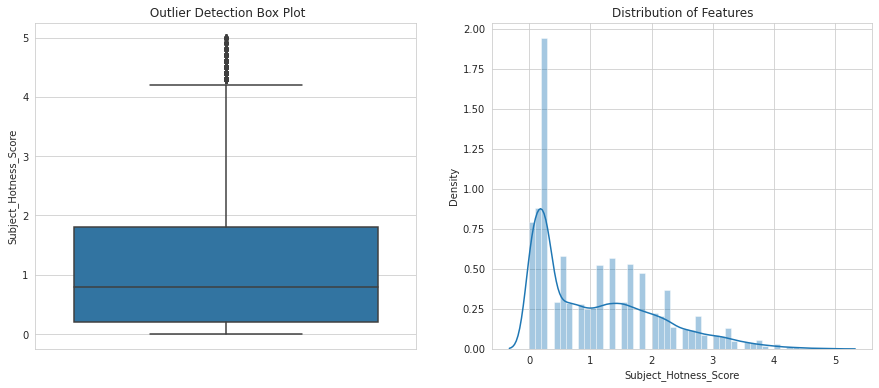

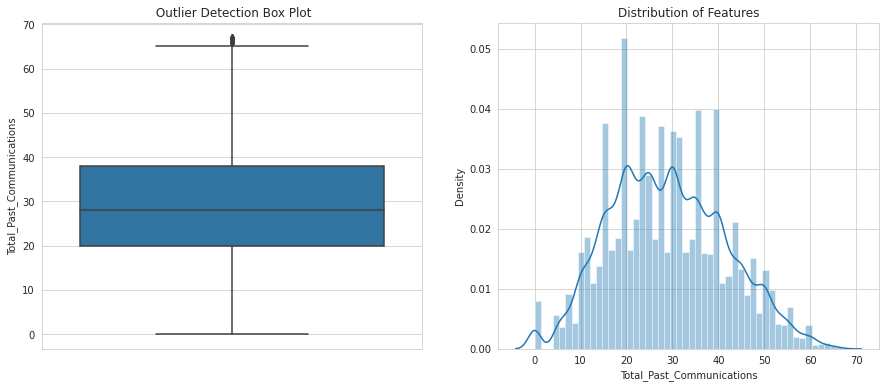

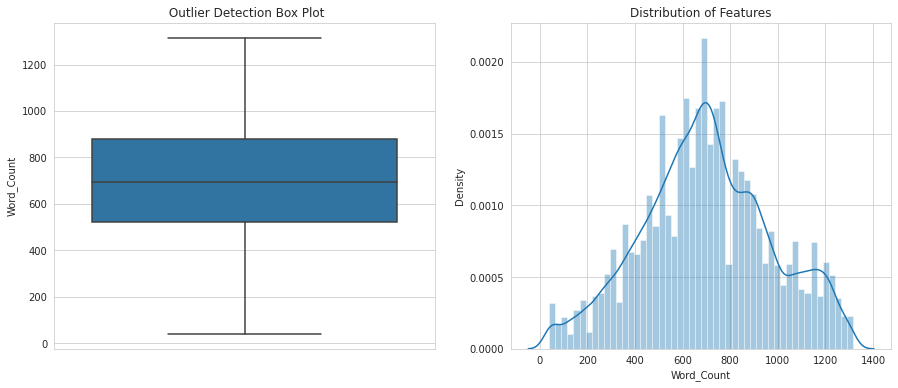

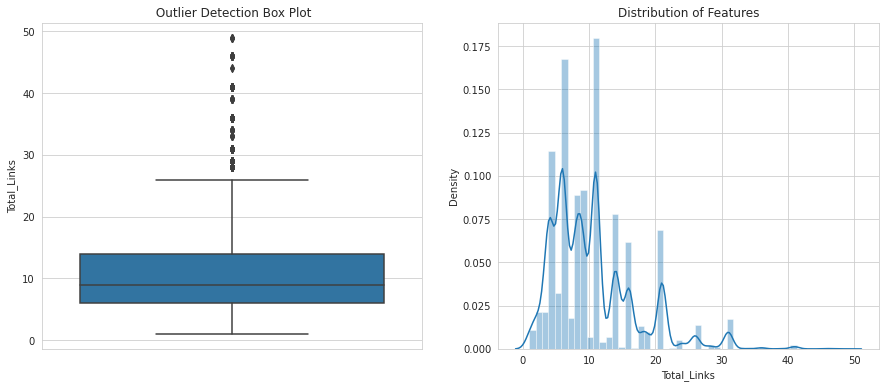

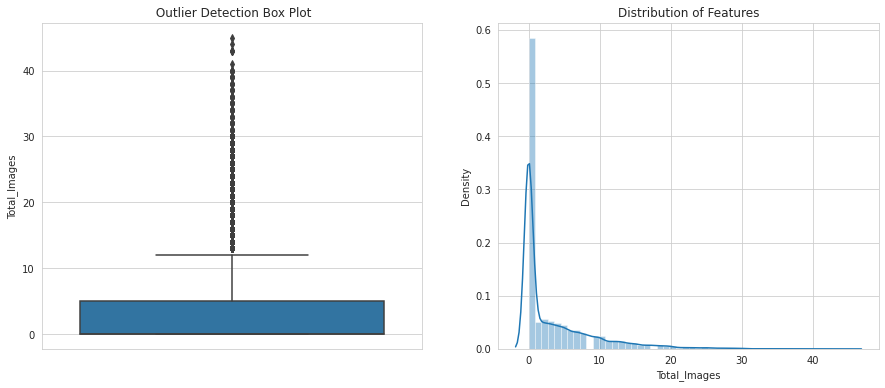

In [ ]:
# Plotting the distribution of the numerical features
for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=email_df[var])
    fig.set_title(' Outlier Detection Box Plot')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(email_df[var].dropna(),)
    fig.set_title("Distribution of Features")
    fig.set_xlabel(var)
    plt.show()



---


# Observations:

---

* ### We observe that 2 features i.e. “ Word Count” and “Total_Past Communications” follow a normal distribution. 

* ### The rest of the features were highly skewed to the left.

* ### As we can observe the "Total_Past_Communications" is symmetricaly distributed so we can use mean value for imputing missing values for this feature.

* ### Since the "Total_Links" is not normally distributed we will use Mode to impute missing value for this feature.

* ### Since the "Total_Images" is not normally distributed and highly rightly skewed, we will use Mode to impute missing value for this feature.

---



In [ ]:
# Imputting null values for total past communications feature with mean
print('Number of missing values before imputing is = ',email_df['Total_Past_Communications'].isnull().sum())
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  0
Number of missing values after imputing is =  0


In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_df['Total_Links'].isnull().sum())
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Links'].isnull().sum())

Number of missing values before imputing is =  0
Number of missing values after imputing is =  0


In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_df['Total_Images'].isnull().sum())
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Images'].isnull().sum())

Number of missing values before imputing is =  0
Number of missing values after imputing is =  0
